# Operationalizing Explanations


In our study, we give these three explanations for the regulator to understand how the robo-advisor
takes a decision.
<br>
<br>
    ▪ __Feature importance scores__- importance provides a score that indicates how useful or
    valuable each feature was in the construction of a model. The more an attribute is used to
    make key decisions with decision trees, the higher its relative importance. In our case, feature
    importance scores will tell us the relative importance of the questions (ie factors), and their
    contribution to the risk categorization.
    <br>
    <br>
    ▪ __Feature relations__- how do features relate to each other and with the output. Correlations
    provide the first level of relationship between questions (features) and with the output risk
    profiles (classes). We can go even deeper to gain further insights into the behaviour of
    different categories (options) within each feature and see how they vary with each other as
    well as the trends and patterns observed and recorded by the models.
    <br>
    <br>
    ▪ __Local explanations__- Local explanations in the context of model interpretability try to answer
    questions regarding specific predictions; why was that particular prediction made? What
    were the influences of different features while making this specific prediction? As mentioned
    above, in our case, local explanations will help explain why a particular user was assigned a
    particular risk category. It can also be useful to explain boundary points and outliers.

## Methodology Adopted

<img src="picture.png"/>

##### Using only the polynomial dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

##### Specify any other sample here

In [2]:
df_stratified = pd.read_csv("Polynomial Data/poly_stratified_sample_27nov2019.csv")

In [3]:
df_stratified.drop(df_stratified.columns[df_stratified.columns.str.contains('unnamed',case=False)],axis=1,inplace=True)
df_stratified.head()

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output,categories
0,0.2,0.6,0.4,0.4,0.3,0.4,1.0,0.50,0.2,0.2,1.122540,1.0
1,1.0,0.8,1.0,1.0,0.3,0.4,0.4,0.60,0.1,0.3,3.704280,4.0
2,1.0,0.6,1.0,0.2,0.1,0.6,0.4,0.65,0.9,0.2,3.220670,3.0
3,0.5,0.1,0.2,0.6,0.6,0.4,0.5,0.65,0.2,0.2,1.117035,1.0
4,1.0,0.6,0.4,0.6,0.1,0.4,0.5,0.80,1.0,0.9,3.033080,3.0


# Modelling the Equation

In [4]:
df_stratified.drop(columns=['output'],inplace=True)
X = df_stratified.drop(columns=['categories'])
Y = df_stratified['categories']
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=42,stratify=Y)

### LOGISTIC REGRESSION

Logistic Regression is a commonly used statistical method for analysing and predicting data with one
or more independent variables and one binary dependent variable; for example spam or not spam
email classifiers, benign or malignant tumour detection. A logistic regression classifier tries to fit data
according to a linear hypothesis function such as Y= W(i)x(i) + B (Similar to a line equation) where Y is
the dependent variable, X represents independent variables from 1 to n, B gives an error bias
(negligible) and W is the weight assigned to each variable. W is an important value as it tells us the
individual contributions of variables in determining Y, our target.
<br>
The independent variable is always binary, in our case there will be five logistic regression classifiers
with their independent variables as 1 (Low Risk) or Not 1 (Not Low Risk), 2 or Not 2 and so forth till
case 5 (High Risk). This format of multiclass classification is called one vs rest, the input sample is
passed through all the classifiers and probability of the sample belonging to classes 1 to 5 is calculated
and the highest probability class wins.
<br>
The interpretation of weights in logistic regression is dependent on the probability of class
classification, the weighted sum is transformed by the logistic function to a probability. Therefore the
interpretation equation is:
<img src="lr2.png"/>
The log function calculates the odds of that happening.
<img src="lr22.png"/>
<br>
Logistic regression is used over linear regression as completely linear model does not output
probabilities, but it treats the classes as numbers (0 and 1) and fits the best hyperplane (for a single
feature, it is a line) that minimizes the distances between the points and the hyperplane. So it simply
interpolates between the points, and you cannot interpret it as probabilities. A linear model also
extrapolates and gives you values below zero and above one. Logistic regression is also widely used,
interpretable and fits our use case relatively well.

In [14]:
print("Train data shape : {} and Test data shape : {}".format(X_train.shape,X_test.shape))

Train data shape : (675000, 10) and Test data shape : (450000, 10)


In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2',solver = 'lbfgs')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
count_misclassified = (Y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 36380
Accuracy: 0.92


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##### Classification Report

In [16]:
print(metrics.classification_report(Y_test,y_pred,target_names=['no risk','low risk','moderate','likes risk','high risk']))

              precision    recall  f1-score   support

     no risk       0.97      0.96      0.96    119524
    low risk       0.89      0.91      0.90    141128
    moderate       0.88      0.87      0.88     96987
  likes risk       0.94      0.94      0.94     64334
   high risk       0.96      0.92      0.94     28027

    accuracy                           0.92    450000
   macro avg       0.93      0.92      0.92    450000
weighted avg       0.92      0.92      0.92    450000



In [17]:
LR_coeff_df = pd.DataFrame(model.coef_,columns=['Age','Dependents','Annual_income','Monthly_loans','Income_stability','Portfolio_status','Investment_obj','Duration_inv','Comfort','Behaviour'])

In [18]:
LR_coeff_df

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour
0,-76.872251,-59.108098,-12.604931,-6.076271,-26.767173,-6.009266,-8.058442,-11.913520,-6.382234,-1.430860
1,-24.896565,-19.826540,-6.192895,-3.444168,-4.440693,-2.298417,-4.525343,-5.520406,-3.526449,-0.707666
2,6.226613,5.290715,-0.694152,-1.119387,3.115908,-0.229893,-1.361149,-0.949575,-1.204480,-0.525315
3,35.611211,25.493726,6.219495,2.813155,10.324957,2.169630,3.484670,5.038326,2.868945,0.703255
4,59.930992,48.150197,13.272483,7.826670,17.767002,6.367946,10.460263,13.345174,8.244217,1.960585


## Stochastic Gradient Descent Classifier
Trial

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(penalty='l2',max_iter=1000,tol=0.0001)
sgd_model.fit(X_train, Y_train)
y_pred_sgd = sgd_model.predict(X_test)
count_misclassified_sgd = (Y_test != y_pred_sgd).sum()
print('Misclassified samples: {}'.format(count_misclassified_sgd))
accuracy_sgd = metrics.accuracy_score(Y_test, y_pred_sgd)
print('Accuracy: {:.2f}'.format(accuracy_sgd))

Misclassified samples: 136989
Accuracy: 0.70


In [20]:
SGD_coeff_df = pd.DataFrame(sgd_model.coef_,columns=['Age','Dependents','Annual_income','Monthly_loans','Income_stability','Portfolio_status','Investment_obj','Duration_inv','Comfort','Behaviour'])
SGD_coeff_df

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour
0,-15.008255,-10.476304,-1.355904,-0.593737,-5.792849,-0.287770,-0.979687,-0.984025,-0.617859,-0.122091
1,-0.009946,0.005714,-0.003245,-0.003527,0.001552,-0.000282,-0.003033,0.001693,0.001129,-0.001481
2,0.003508,0.006861,0.000780,-0.001403,0.001403,-0.000234,-0.000195,-0.003508,0.004132,0.000702
3,4.061291,2.254143,0.033145,0.016295,0.020368,0.007129,-0.022128,0.000926,0.000093,-0.006111
4,11.360984,11.505292,3.400762,2.364368,3.660179,1.236564,3.869870,4.152561,2.674990,0.895684


## Naive Bayes

Naive Bayes classifiers are a family of classifiers that work on predicting future outcomes using conditional probability, given a history of behaviour; for example given say a year long history of weather forecasts with features such as humidity, rainfall, temperature a classifier from the naive Bayes family can be trained and used to predict future weather conditions. 
<br>
The Bayes algorithm works under a “naive” assumption that all the features are independent in nature, in our case that means the naive Bayes classifier is going to assume that our variables such as age, income are uncorrelated so finding probabilities can be thought of as a simple counting calculation. This implies that the classifier won’t be a right fit for our case as we know that the data was generated using many correlations (such as age will affect an individual's income, behaviour etc..). Due to its simplicity it has found a place in many real world systems such as credit scoring systems, weather prediction and many others so for the sake of representing and explaining all classifiers we will try this one out as well.
<br>
<br>
If the naive Bayes classifier wants to calculate the probability of observing features f1 to fn, given a class c (In our case c here, represents the risk class and f values represent all our question-answer scores), then
<br>
<img src="gnb1.png"/>
<br>
This means that when Naive Bayes is used to classify a new example, the posterior probability is much simpler to work with:
<br>
<img src="gnb2.png"/>
<br>
<br>
But we have left p(fn | c) undefined i.e. the occurrence of a certain feature given a class which means we haven’t taken the distribution of the features into account yet. Therefore for our case we have used a gaussian naive Bayes classifier that simply assumes p (fn | c) is a gaussian normal distribution, this works well for our data which is a normal distribution.
<br>
<br>
Then the formula for our low risk class used by the classifier will be something like:
P ( low-risk / Age, Income, Dependents ..) = P( low-risk / Age-category) * P(low-risk / Income-
category) etc/ P(Age) * P(income) etc
<br>
<br>
This will be calculated for all risk categories and the class with the highest probability is given as the
final prediction.
<br>
<br>
Naive Bayes is an interpretable model because of the independence assumption. It can be interpreted
on the modular level. The contribution made by each feature towards a specific class prediction is
clear, since we can interpret the conditional probability.

In [21]:
from sklearn import naive_bayes
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, Y_train) 
gnb_predictions = gnb.predict(X_test) 
count_misclassified_gnb = (Y_test != gnb_predictions).sum()
print('Misclassified samples: {}'.format(count_misclassified_gnb))
accuracy_gnb = metrics.accuracy_score(Y_test, gnb_predictions)
print('Accuracy: {:.2f}'.format(accuracy_gnb))

Misclassified samples: 146704
Accuracy: 0.67


In [22]:
print(metrics.classification_report(Y_test,gnb_predictions,target_names=['no risk','low risk','moderate','likes risk','high risk']))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     no risk       0.98      0.92      0.95    119524
    low risk       0.71      0.98      0.82    141128
    moderate       0.90      0.28      0.43     96987
  likes risk       0.00      0.00      0.00     64334
   high risk       0.25      1.00      0.40     28027

    accuracy                           0.67    450000
   macro avg       0.57      0.64      0.52    450000
weighted avg       0.69      0.67      0.63    450000



In [23]:
print("Class probabilities:{},\n Class counts:{}".format(gnb.class_prior_,gnb.class_count_))

Class probabilities:[0.26560889 0.31361926 0.21552593 0.14296593 0.06228   ],
 Class counts:[179286. 211693. 145480.  96502.  42039.]


In [24]:
#variance of each feature per class
gnb.sigma_

array([[2.31569379e-02, 9.64428153e-02, 8.09019435e-02, 7.96432099e-02,
        8.18510013e-02, 2.22010706e-02, 3.98699965e-02, 9.97560992e-03,
        1.29544333e-01, 1.01563376e-01],
       [8.60924046e-02, 1.08624382e-01, 7.79885235e-02, 8.02872262e-02,
        1.18329495e-01, 2.23477262e-02, 4.04979652e-02, 1.00200036e-02,
        1.29888880e-01, 1.01463076e-01],
       [5.68007147e-02, 6.81835242e-02, 8.07526474e-02, 8.01763995e-02,
        1.19087691e-01, 2.23417127e-02, 4.18714721e-02, 9.96662553e-03,
        1.30460846e-01, 1.01119277e-01],
       [1.07093490e-02, 2.41652058e-02, 7.77003972e-02, 7.91734963e-02,
        1.13813851e-01, 2.24836857e-02, 4.03265965e-02, 9.90807681e-03,
        1.29136534e-01, 1.01813433e-01],
       [1.30315424e-10, 1.03887395e-02, 6.95385862e-02, 7.43921217e-02,
        1.05803148e-01, 2.36165245e-02, 4.99277408e-02, 9.72422647e-03,
        1.14191632e-01, 1.02158418e-01]])

In [25]:
#absolute additive value to variances
gnb.epsilon_

1.3031542364442247e-10

In [26]:
NB_coeff_df = pd.DataFrame(gnb.sigma_,columns=['Age','Dependents','Annual_income','Monthly_loans','Income_stability','Portfolio_status','Investment_obj','Duration_inv','Comfort','Behaviour'])

In [27]:
NB_coeff_df['Counts'] = gnb.class_count_
NB_coeff_df['Prior Probabilities'] = gnb.class_prior_
NB_coeff_df['Class'] = ['no risk','low risk','moderate','likes risk','high risk']

In [28]:
NB_coeff_df[['Class','Prior Probabilities','Counts','Age','Dependents','Annual_income','Monthly_loans','Income_stability','Portfolio_status','Investment_obj','Duration_inv','Comfort','Behaviour']]

,Class,Prior Probabilities,Counts,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour
0,no risk,0.265609,179286.0,2.315694e-02,0.096443,0.080902,0.079643,0.081851,0.022201,0.039870,0.009976,0.129544,0.101563
1,low risk,0.313619,211693.0,8.609240e-02,0.108624,0.077989,0.080287,0.118329,0.022348,0.040498,0.010020,0.129889,0.101463
2,moderate,0.215526,145480.0,5.680071e-02,0.068184,0.080753,0.080176,0.119088,0.022342,0.041871,0.009967,0.130461,0.101119
3,likes risk,0.142966,96502.0,1.070935e-02,0.024165,0.077700,0.079173,0.113814,0.022484,0.040327,0.009908,0.129137,0.101813
4,high risk,0.062280,42039.0,1.303154e-10,0.010389,0.069539,0.074392,0.105803,0.023617,0.049928,0.009724,0.114192,0.102158


## Decision Tree


Decision trees belong to the family of tree based learning algorithms, they are widely used for supervised classification as they create precise, well defined and hierarchical decision boundaries for categorical and continuous data. This differs from classifiers that use a single separation boundary (or line) such as logistic regression by iteratively splitting the data into subparts by identifying multiple divisive boundaries.
<br>
<br>
The conditions that make these divisions try to ensure an absence of impurities in the populations contained by them; for example a condition that decision tree will make to describes a ‘banana’ could be in the sequence type=”fruit”, colour = “yellow”, shape = “crescent”, spots = “true” this leaves no place for uncertainty or impurity. The algorithm stops when all classes are pure or there are no features left to divide upon.
Unfortunately such sharp dividing conditions are not always possible or may exceed certain time and space limitations in real life. Therefore when a clear separation of classes is not possible then we can have a stopping condition that tolerates some impurity (For example gini impurity measures quality of such splits by calculating the probability of an incorrect classification of a randomly picked datapoint).
<br>
<br>
The impurity itself can be calculated using a measure of randomness, __entropy__: H= -p(x)log(p(x))or -plog(p) -qlog(q) where p =probability of success and q = prob of failure 
Ideally H should be as small as possible.
<br>
<br>
For a dataset like ours with multiple features, deciding the splitting feature i.e. most important dividing condition at each step is a complex task, this feature should reduce the impurity through the split or one with gives the most information gain. __Information gain__ at each node is calculated by the lowest entropy generated nodes by the split.
<br>
<br>
Starting from the root node, you go to the next nodes and the edges tell you which subsets you are looking at. Once you reach a leaf node, the node tells you the predicted outcome. All the edges are connected by ‘AND’. For example: If feature x is [smaller/bigger] than threshold c AND etc… then the predicted outcome is the mean value of y of the instances in that node.
<br>
<br>
Individual decisions made by the tree can also be explained by going down a particular path based on the input given. 
<br>
<br>
Decision trees can be used to explain the dataset by themselves.

In [5]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 18).fit(X_train, Y_train) 
dtree_predictions = dtree_model.predict(X_test) 
count_misclassified_dtree = (Y_test != dtree_predictions).sum()
print('Misclassified samples: {}'.format(count_misclassified_dtree))
accuracy_dtree = metrics.accuracy_score(Y_test, dtree_predictions)
print('Accuracy: {:.2f}'.format(accuracy_dtree))

Misclassified samples: 10598
Accuracy: 0.98


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


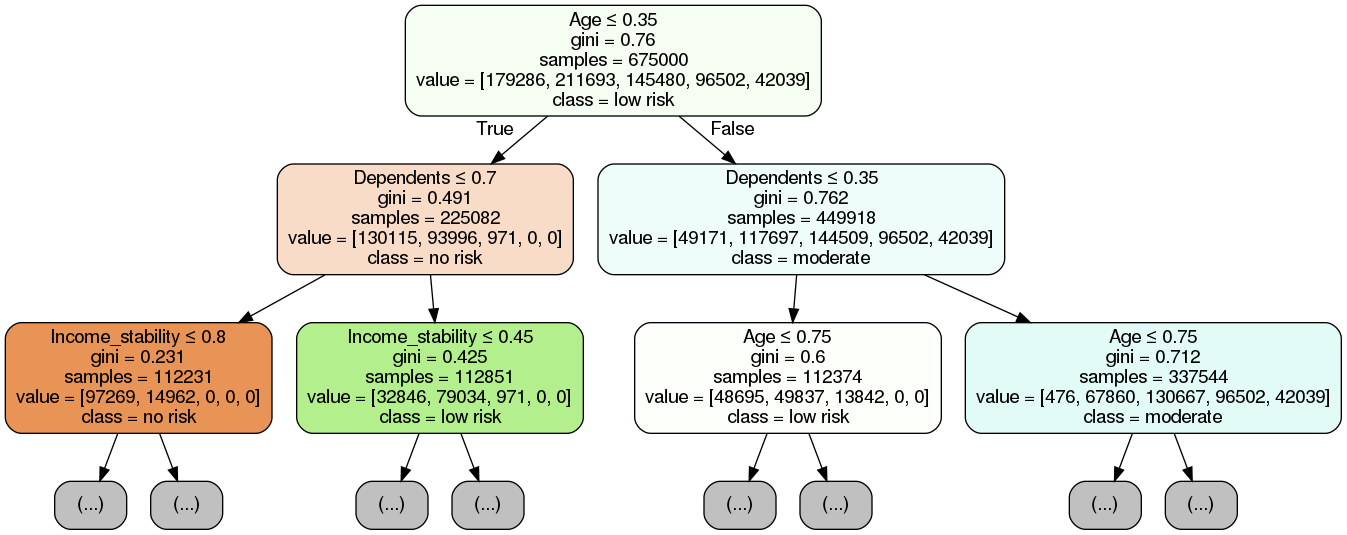

In [6]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from IPython.display import Image
import graphviz

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree_model, out_file=dot_data,  
                filled=True,max_depth=2, rounded=True,feature_names=['Age','Dependents','Annual_income','Monthly_loans','Income_stability','Portfolio_status','Investment_obj','Duration_inv','Comfort','Behaviour'],
                special_characters=True,class_names=['no risk','low risk','moderate','likes risk','high risk'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [7]:
print(metrics.classification_report(Y_test,dtree_predictions,target_names=['no risk','low risk','moderate','likes risk','high risk']))

              precision    recall  f1-score   support

     no risk       0.99      0.99      0.99    119524
    low risk       0.98      0.99      0.98    141128
    moderate       0.97      0.97      0.97     96987
  likes risk       0.95      0.95      0.95     64334
   high risk       0.95      0.94      0.94     28027

    accuracy                           0.98    450000
   macro avg       0.97      0.97      0.97    450000
weighted avg       0.98      0.98      0.98    450000



In [8]:
pd.DataFrame(np.array(dtree_model.feature_importances_).reshape(1,-1),columns=['Age','Dependents','Annual_income','Monthly_loans','Income_stability','Portfolio_status','Investment_obj','Duration_inv','Comfort','Behaviour'])

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour
0,0.276502,0.272707,0.085027,0.041055,0.176711,0.009792,0.046848,0.027327,0.050144,0.013888


In [9]:
dtree_model.feature_importances_

array([0.27650189, 0.27270696, 0.08502657, 0.04105471, 0.17671079,
       0.00979213, 0.04684768, 0.0273274 , 0.05014381, 0.01388805])

## Support Vector Machine

A support vector machine finds an equation of a hyper-plane that separates two or more classes in a
multidimensional space; for example if we consider a two dimensional space this “hyperplane” will
become a line dividing the plane on which the data lies into two separate classes. If the data is not
linearly separable i.e. there is no clear line separating the classes (This happens in many cases imagine
two classes in the data forming concentric circles ) then data can be transformed onto a different
plane (say we view the concentric circles from z axis ) it becomes a linearly separable problem again (
Imagine the points in the circle having different depth ), after separating we can transform it back to
the original plane : this is done using a kernel function in SVM.
<br>
<br>
Support vector machines have become wildly popular due to their robust efficiency and high accuracy
despite requiring very few samples to train. They have disadvantages especially when it comes totime and space complexity but the SVM algorithm along with it’s variations are being used
commercially in face detection, protein fold predictions find some example
SVM for multiclass classification trains n*(n-1)/2 classifiers, where n is the number of classes in the
problem. Therefore for our problem there will be 10 different classifiers each will choose
permutations of classes as the binary dependent variable(Y) i.e. 1 or 2, 2 or 3, 1 or 4 and all others.
<br>
<br>
During this each classifier predicts one class instead of probabilities for each
Interpreting the above is quite difficult, the benefit of a linear model was that the weights /
parameters of the model could be interpreted as the importance of the features. Well we can’t do
that now, once we engineer a high or infinite dimensional feature set, the weights of the model
implicitly correspond to the high dimensional space which isn’t useful in aiding our understanding of
SVM’s. What we can do is fit a logistic regression model which estimates the probability of label y
being 1, given the original features, where f(x) is the SVM decision function:
<img src="svm1.png"/>
<br>
We use __maximum likelihood estimation__ to fit the parameters of this logistic regression model, the
technique is called Platt Scaling.
For our use case we use a polynomial kernel for learning hyperplane boundaries as our original
equation used to generate data is correlated in a polynomial fashion but this adds some more
complexity to the algorithm. The polynomial kernel can be written as K(x,xi) = 1+( (xxi) )d(this is the
previously mentioned f(x)) , x is the input vector and xi represents support vectors (hyperplane
equations).

##### Taking a smaller sample for convenience

In [34]:
X_train_svc , X_test_svc, Y_train_svc, Y_test_svc = train_test_split(X,Y,test_size=0.93,random_state=42,stratify=Y)
X_train_svc.shape

(78750, 10)

##### Distribution of smaller set.

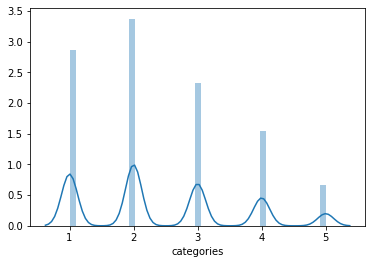

In [35]:
%matplotlib inline
import seaborn as sns
sns.distplot(Y_train_svc)

In [37]:
Y_train_svc.value_counts()

2.0    24697
1.0    20917
3.0    16973
4.0    11258
5.0     4905
Name: categories, dtype: int64

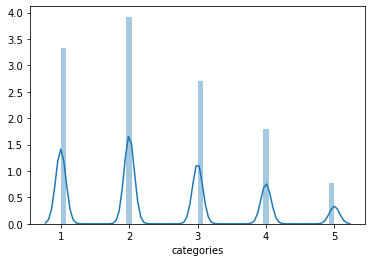

In [38]:
sns.distplot(Y_test_svc)

##### Using the polynomial kernel function

In [39]:
# training a polynomial SVM classifier 
from sklearn.svm import SVC 
poly_model = SVC(kernel = 'poly', C = 1,probability=True).fit(X_train_svc, Y_train_svc) 
Y_svc_predictions = poly_model.predict(X_test_svc) 

In [40]:
count_misclassified_poly = (Y_test_svc != Y_svc_predictions).sum()
print('Misclassified samples: {}'.format(count_misclassified_poly))
accuracy = metrics.accuracy_score(Y_test_svc, Y_svc_predictions)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 11344
Accuracy: 0.99


In [41]:
print(metrics.classification_report(Y_test_svc,Y_svc_predictions,target_names=['no risk','low risk','moderate','likes risk','high risk']))

              precision    recall  f1-score   support

     no risk       0.99      1.00      1.00    277893
    low risk       0.99      0.99      0.99    328124
    moderate       0.99      0.99      0.99    225494
  likes risk       0.98      0.98      0.98    149578
   high risk       0.98      0.98      0.98     65161

    accuracy                           0.99   1046250
   macro avg       0.99      0.99      0.99   1046250
weighted avg       0.99      0.99      0.99   1046250



In [42]:
poly_model.n_support_

array([ 640, 1230,  935,  637,  284], dtype=int32)

## K Nearest Neighbours

Neighbours-based classification is a type of instance-based learning or non-generalizing learning: it does not try to construct a general internal model, but simply stores instances of the training data. K nearest neighbours is perhaps the simplest algorithm, a data point is classified by a majority vote of its neighbours. The input is assigned the class most common among its ‘k’ nearest neighbours, where ‘k’ is a small positive integer, the value of ‘k’ is chosen depending on the data. KNN is very useful in applications that require searching for similar items; such as recommender systems, bio-surveillance software, document retrieval systems such as concept search which is used in many e-Discovery software packages.  
<br>
<br>
These neighbours are decided using brute force techniques that calculate distance from the data point of interest to all the other data points in the dataset, by using formulae like Euclidean distance. This means that the time and space complexity of this operation is very high; for n samples in d dimensions the time complexity will be O(d*n*n) which makes this algorithm too slow to run on large datasets such as ours but we will still cover it as it would be useful to see people and question-answers that could be grouped into one risk category.
<br>
<br>
Since KNN is an instance based algorithm there is no learned model, there are no parameters to learn, so there is no interpretability on a modular level. There is a lack of global model interpretability because the model is inherently local and there are no global weights or structures explicitly learned. 
<br>
<br>
To explain a prediction at a local level, we can always retrieve the k neighbours that were used for the prediction. This is useful for our dataset as there will be thousands of neighbouring data points but presenting those ‘k’ nearest points could be a very useful explanation for each category.

In [10]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, Y_train)
knn_predictions = knn.predict(X_test)
count_misclassified_knn = (Y_test != knn_predictions).sum()
print('Misclassified samples: {}'.format(count_misclassified_knn))
accuracy_knn = metrics.accuracy_score(Y_test, knn_predictions)
print('Accuracy: {:.2f}'.format(accuracy_knn))

Misclassified samples: 12138
Accuracy: 0.97


In [11]:
print(metrics.classification_report(Y_test,knn_predictions,target_names=['no risk','low risk','moderate','likes risk','high risk']))

              precision    recall  f1-score   support

     no risk       0.99      0.99      0.99    119524
    low risk       0.98      0.98      0.98    141128
    moderate       0.97      0.96      0.96     96987
  likes risk       0.94      0.95      0.95     64334
   high risk       0.96      0.92      0.94     28027

    accuracy                           0.97    450000
   macro avg       0.97      0.96      0.96    450000
weighted avg       0.97      0.97      0.97    450000



## Feature Relationships

While determining feature importance is a crucial task in any supervised learning problem, ranking
features is only part of the story. Once a subset of "important" features is identified we need to assess
the interations and relationship between them (or a subset) and the response.

### Correlations in dataset

In [36]:
corrz = df_stratified.corr()

Text(0.5, 1, 'Correlations between all features and outcomes')

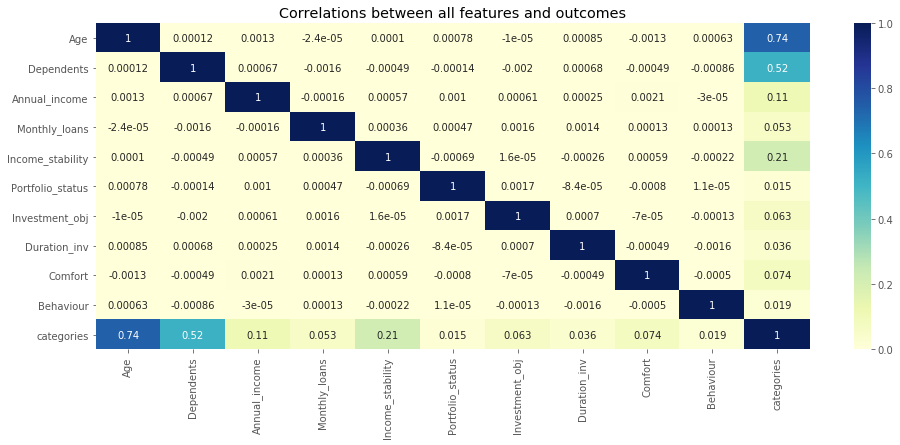

In [42]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.heatmap(corrz,annot=True,cmap="YlGnBu")
plt.title("Correlations between all features and outcomes")

### Partial Dependence Plots

These plots portray the marginal effect one or two features have on the output variable
or the risk categories and whether it is simply linear or more complex in nature.
<br>
<br>
PDP can be used as a model agnostic global level understanding method to gather insights into
black box models. Model agnostic means that PDP’s make no assumptions regarding the underlying
model.

In [27]:
import skater
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [28]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
interpreter = Interpretation(X_test, feature_names=X_train.columns)

2019-12-07 21:44:50,539 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[3/3] grid cells ████████████████████ Time elapsed: 0 seconds

[[<Figure size 360x360 with 1 Axes>,
  <Figure size 360x360 with 1 Axes>,
  <Figure size 360x360 with 1 Axes>,
  <Figure size 360x360 with 1 Axes>,
  <Figure size 360x360 with 1 Axes>,

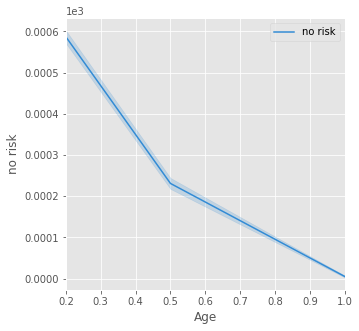

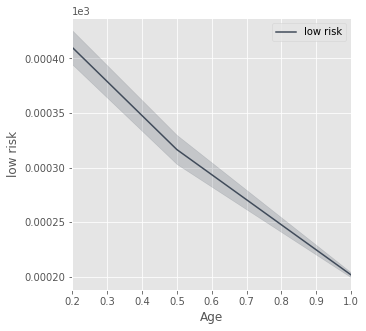

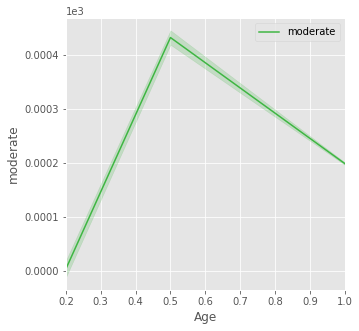

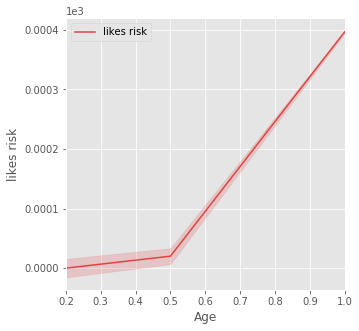

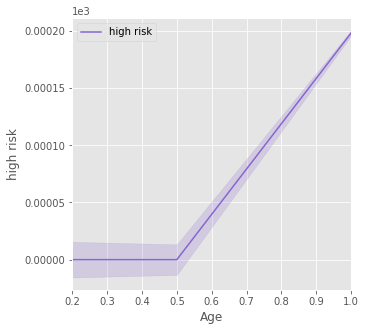

In [29]:
pyint_model_dtree = InMemoryModel(dtree_model.predict_proba, examples=X_train, target_names=['no risk','low risk','moderate','likes risk','high risk'])
interpreter.partial_dependence.plot_partial_dependence(['Age'],pyint_model_dtree,grid_resolution=30,with_variance=True,figsize = (5, 5))

2019-12-07 22:39:41,035 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[12/12] grid cells ████████████████████ Time elapsed: 0 seconds

[[<Figure size 1152x720 with 2 Axes>,
  <Figure size 1152x720 with 2 Axes>,
  <Figure size 1152x720 with 2 Axes>,
  <Figure size 1152x720 with 2 Axes>,
  <Figure size 1152x720 with 2 Axes>,

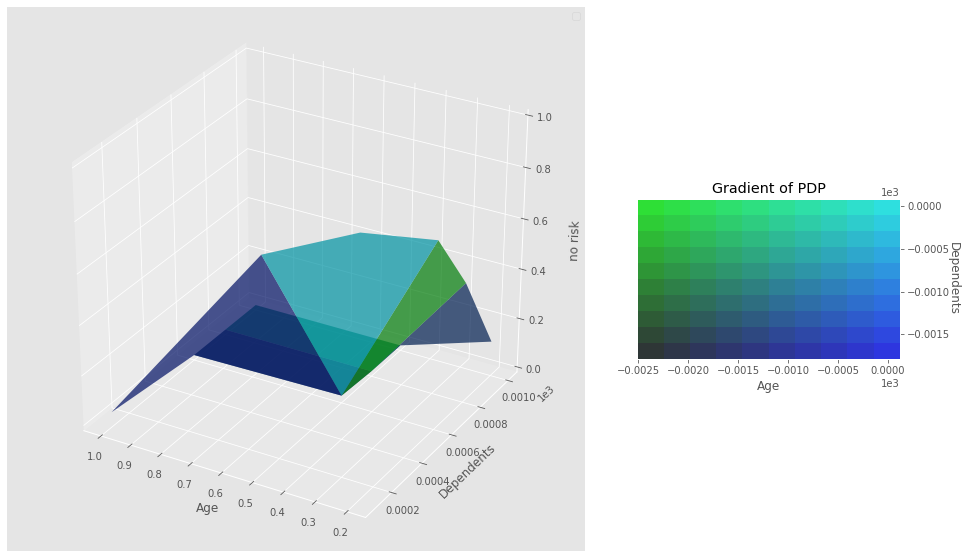

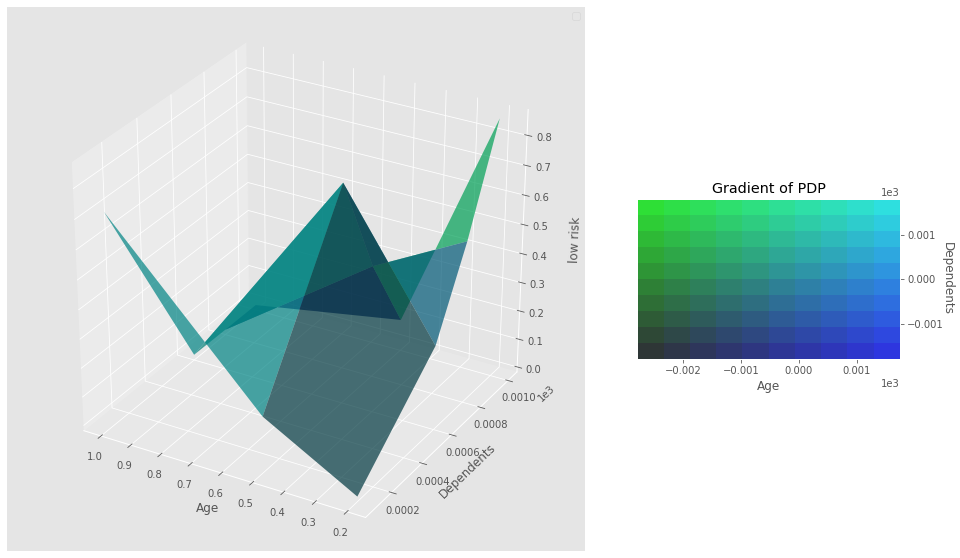

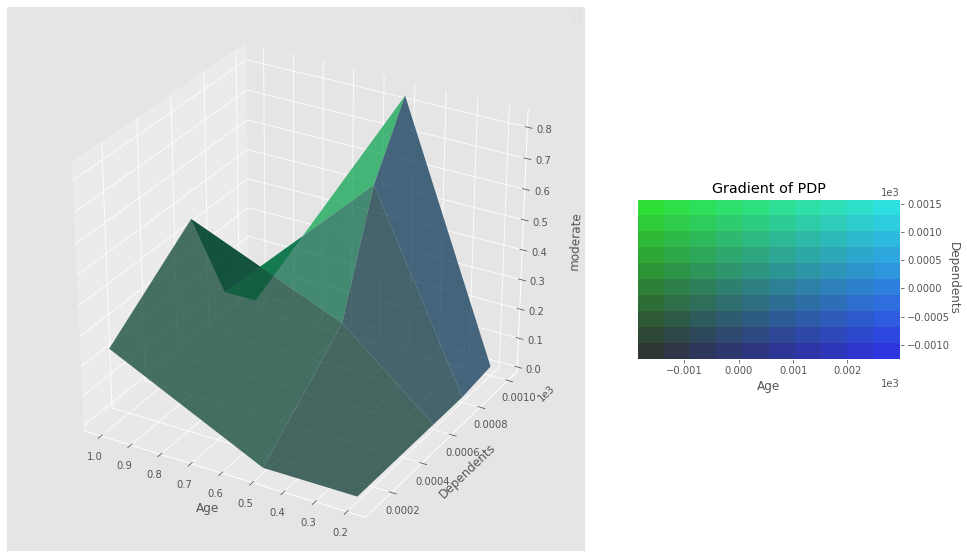

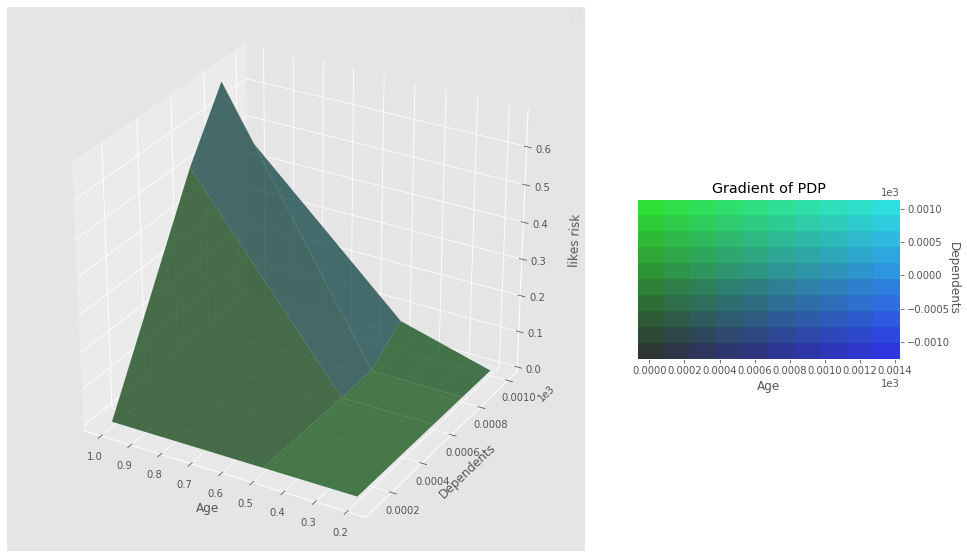

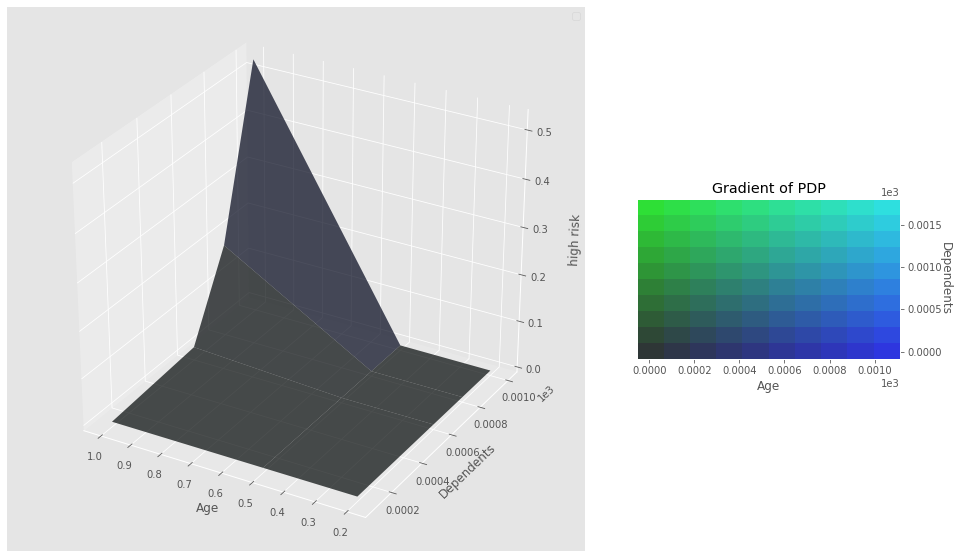

In [32]:
pyint_model_dtree1 = InMemoryModel(dtree_model.predict_proba, examples=X_train, target_names=['no risk','low risk','moderate','likes risk','high risk'])
interpreter.partial_dependence.plot_partial_dependence([('Age','Dependents')],pyint_model_dtree1,grid_resolution=15)

In [ ]:
pyint_model_gnb = InMemoryModel(gnb.predict_proba, examples=X_train, target_names=['no risk','low risk','moderate','likes risk','high risk'])
interpreter.partial_dependence.plot_partial_dependence(['Age'],pyint_model_gnb,grid_resolution=30,with_variance=True,figsize = (5, 5))

In [ ]:
pyint_model_gnb1 = InMemoryModel(gnb.predict_proba, examples=X_train, target_names=['no risk','low risk','moderate','likes risk','high risk'])
interpreter.partial_dependence.plot_partial_dependence([('Age','Dependents')],pyint_model_gnb1,grid_resolution=10,figsize = (10, 7))

## Individual Conditional Explanations

Individual Conditional Expectation (ICE) plots display one line per instance that shows how the instance’s prediction changes when a feature changes.

The partial dependence plot for the average effect of a feature is a global method because it does not focus on specific instances, but on an overall average. The equivalent to a PDP for individual data instances is called individual conditional expectation (ICE) plot

In [12]:
import pdpbox
%matplotlib inline
from pdpbox import pdp, get_dataset, info_plots

In [13]:
pdp_feat_x_11_rf = pdp.pdp_isolate(model=dtree_model, dataset=X_train, model_features=X_train.columns, feature='Age')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


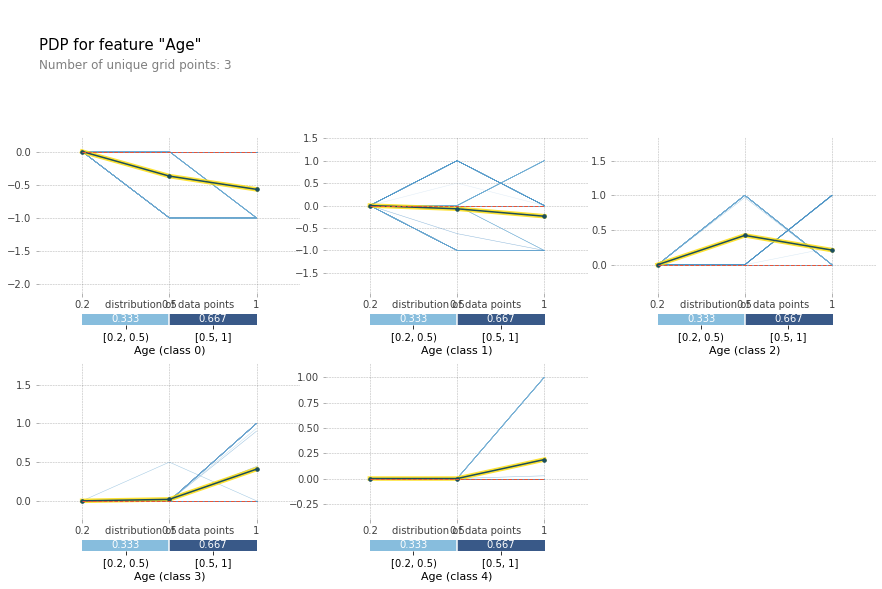

In [14]:
fig, axes = pdp.pdp_plot(
    pdp_isolate_out=pdp_feat_x_11_rf, feature_name='Age', center=True, x_quantile=True, 
    ncols=3, plot_lines=True, frac_to_plot=100,which_classes=[0, 1, 2, 3, 4], plot_pts_dist=True
)

## Feature Importances using Global Explanations

A global surrogate model is an interpretable model that is trained to approximate the predictions of a black box model. We can draw conclusions about the black box model by interpreting the surrogate model.
<br>
Feature importance gives us an intuitive idea regarding relative contributions made by each feature
(question) in the decisions made by the model while deciding the risk categories.
<br>
<br>
To find these contributions we use the concept of shapley values, commonly used to decide relative
contributions made by each feature in game theory. To do this we used a library called SHAP, a
unified framework built on top of several model interpretability algorithms such as LIME, and
DeepLIFT. The SHAP package can be used for multiple kinds of models like trees or deep neural
networks as well as different kinds of data including tabular data and image data.
<br>
Shapely values are relative thus the impacts made by each feature makes sense only in the context
of other features, this means as the features/ questions change we will see different patterns
emerging.

In [7]:
import shap
shap.initjs()

In [45]:
x = shap.kmeans(X_train,200)

In [46]:
explainer = shap.KernelExplainer(dtree_model.predict_proba, x)

Using 200 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


In [50]:
shap_values = explainer.shap_values(X_test[0:200])
X_test_array = X_test[0:200].to_numpy()

/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will chan

/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will chan

/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will chan

/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will chan

/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will chan

/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will chan

/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will chan

/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will chan

/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/ubuntu/.local/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


In [58]:
len(shap_values)

5

__Feature importance scores__ are part of the global explanations and have been found using the SHAP
values. They have been represented using SHAP plots. They tell how much each feature (question)
contributes to the ADS risk categorization process. Here, we report three importance scores- the
feature importance, the class-wise feature importance, and the class and category wise feature
importance.

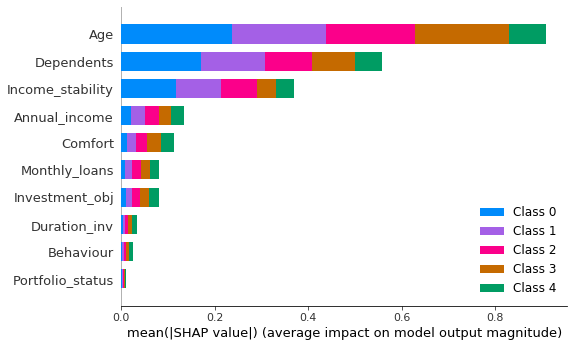

In [59]:
shap.summary_plot(shap_values, X_test_array, feature_names=X_train.columns)

From the plot above we can gather that ‘Age’ is the most important feature in the model contributing
the most to all the categories which is positive as reflects the way we designed our polynomial
dataset. This allows the evaluator to understand the inner workings of the risk profiling process and
debug the algorithm used. The feature importance scores are useful but further analysis needs to be
done; finding the distribution and behaviour of each feature in each class, analysing positive and
negative impacts of features and the categories in the features.

### Category wise feature behaviour

The plots below cover the effect of each feature as well as show the importance of the features in
each category (risk class). The plots below have features on the y axis ordered based on their
importance and shapely values on the x axis. The colour represents the score of each feature
category. A sample of points are taken as representation and they are scattered to show a general
distribution of the data points.

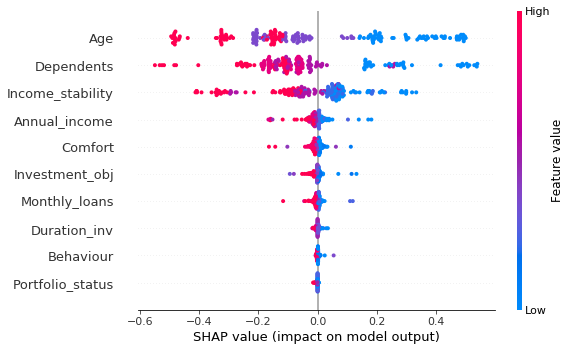

In [60]:
shap.summary_plot(shap_values[0], X_test_array,feature_names=X_train.columns,class_names=['no risk','low risk','moderate','likes risk','high risk'])

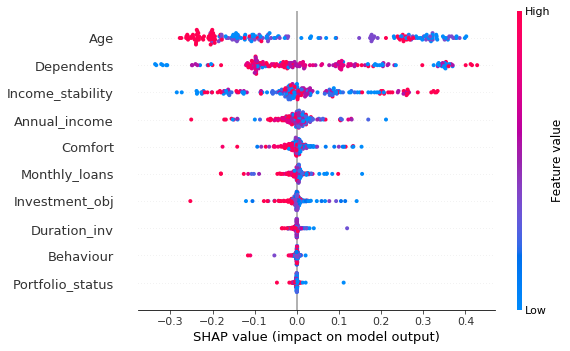

In [61]:
shap.summary_plot(shap_values[1], X_test_array,feature_names=X_train.columns,class_names=['no risk','low risk','moderate','likes risk','high risk'])

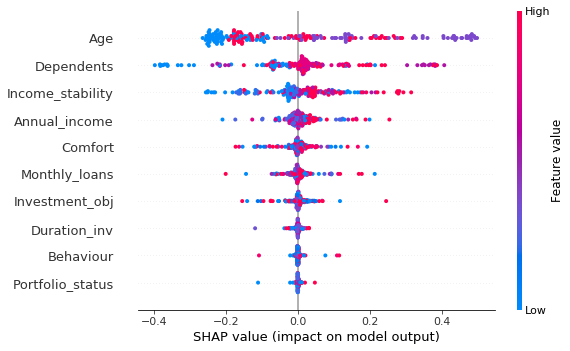

In [62]:
shap.summary_plot(shap_values[2], X_test_array,feature_names=X_train.columns,class_names=['no risk','low risk','moderate','likes risk','high risk'])

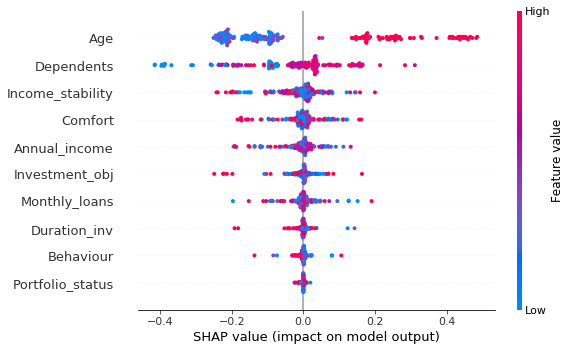

In [63]:
shap.summary_plot(shap_values[3], X_test_array,feature_names=X_train.columns,class_names=['no risk','low risk','moderate','likes risk','high risk'])

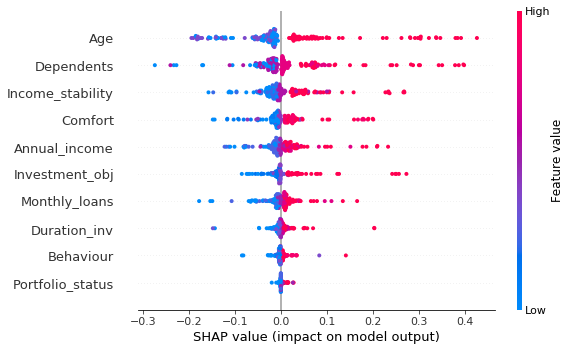

In [64]:
shap.summary_plot(shap_values[4], X_test_array,feature_names=X_train.columns,class_names=['no risk','low risk','moderate','likes risk','high risk'])

For convenience scores for age are:
    <img src="gs.png" width=550 height=550/>
    
A strikingly obvious trend can be seen in ‘Age’ where we can see high scores of the feature go from
contributing highly positively to the high risk class to contributing negatively in the low/no risk class.
The second most important feature ‘Dependents’ is very important in the extreme classes but shows
no specific trend in the other classes. High values of annual income and stability contribute negatively
in low risk taking behaviour of individuals. Basically with these plots we can see the general trends of
the data points in the dataset and the model. In this case they can correctly model and communicate
the assumptions taken by us while generating the dataset which will be an invaluable insight in cases
where the assumptions are not available.

## Local Explanations

The plot gives 'local' explanations for a single observation i.e. the reasoning taken by the decision tree
model while classifying the observation in a specific category. The observation taken has it's feature
values displayed top right along with the final prediction class it belongs to. The contributions of each
feature to and against every class are shown. The highest contributions made by the top features are
in the no risk class, all other class contributions are negligible thus the final prediction is no risk.
Insights provided into which features negatively affect the decisions are also valuable for example;
annual income, income stability and portfolio status are actually pushing the decision away from no
risk but not strongly enough to change the category of prediction.

In [7]:
import lime
import lime.lime_tabular

In [8]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), feature_names=list(X_train.columns), class_names=['no risk','low risk','moderate','likes risk','high risk'], categorical_features=list(X_train.columns),categorical_names=list(X_train.columns), verbose=True, kernel_width=5)

In [17]:
observation_no = 9
X_test_numpy=X_test.to_numpy()

In [18]:
#predicted probability for target variable
predict_func_dtree = lambda x: dtree_model.predict_proba(x).astype(float)
exp = explainer.explain_instance(X_test_numpy[observation_no],predict_func_dtree,num_features=len(X.columns),top_labels=5)

Intercept 0.2429230496634669
Prediction_local [0.45218322]
Right: 0.0
Intercept 0.27625995454808566
Prediction_local [0.09097117]
Right: 0.0
Intercept 0.22607743430069033
Prediction_local [-0.00164079]
Right: 0.0
Intercept 0.11140541848960009
Prediction_local [0.0243906]
Right: 0.0
Intercept 0.14333414299815656
Prediction_local [0.4340958]
Right: 1.0


In [19]:
exp.show_in_notebook(show_table=True)

##### Boundaries of decision

In [20]:
exp.as_list()

[('Age <= 0.20', 0.1868331721618646),
 ('Annual_income > 0.80', -0.03715403737704284),
 ('0.20 < Comfort <= 0.50', 0.022959151004931663),
 ('0.80 < Dependents <= 1.00', 0.01812330879347081),
 ('Duration_inv <= 0.60', 0.01526005701446619),
 ('Monthly_loans <= 0.40', 0.006426133244339413),
 ('Behaviour <= 0.30', 0.0047982714763868525),
 ('Income_stability <= 0.10', -0.004324141606243882),
 ('Portfolio_status <= 0.40', -0.004092159707073433),
 ('Investment_obj <= 0.50', 0.0004304198924450484)]

In [21]:
X_test_numpy[observation_no]

array([0.2, 1. , 1. , 0.4, 0.1, 0.4, 0.4, 0.5, 0.5, 0.2])

In [24]:
Y_test.iloc[observation_no]

1.0

In [26]:
exp.save_to_file("Explanation.pdf")